In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import scale
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split

url = "https://github.com/laurent0001/tsv/raw/master/CDOM.gradient.mat.tsv"
url_mesh = "https://github.com/laurent0001/tsv/raw/master/Bray_distances_by_CDOM_gradient_meshgrid.tsv"
url_CDOM_sorted = "https://github.com/laurent0001/tsv/raw/master/CDOM.tsv"
CDOM = pd.read_csv(url, sep="\t")
CDOM.mesh = pd.read_csv(url_mesh, sep="\t")
CDOM_sorted = pd.read_csv(url_CDOM_sorted, sep="\t")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


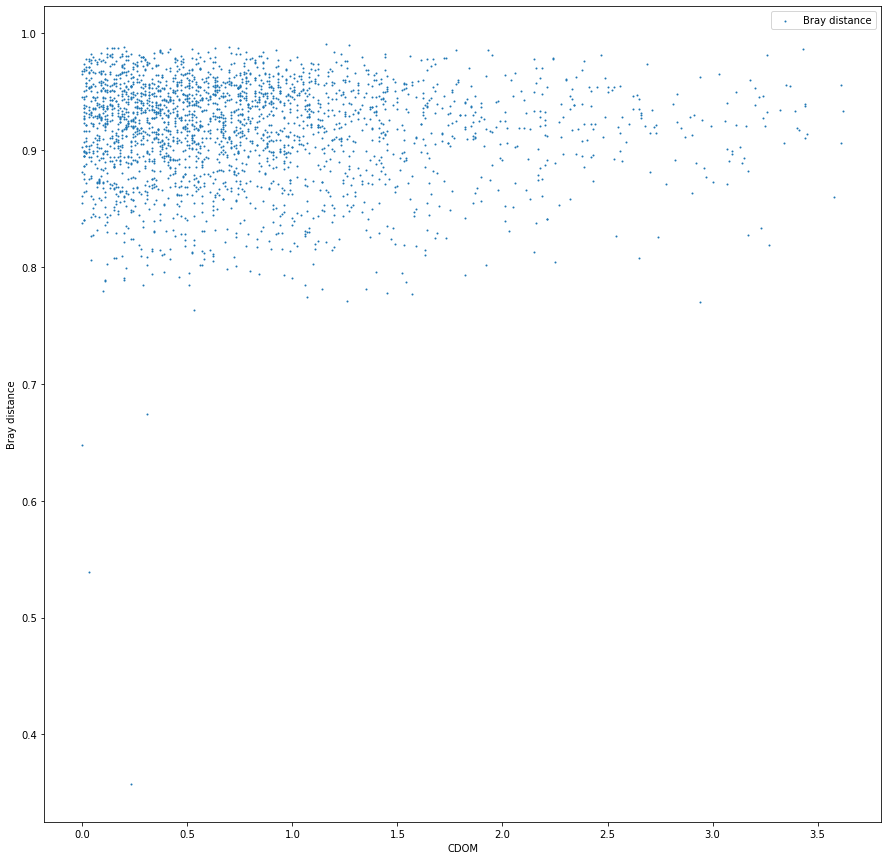

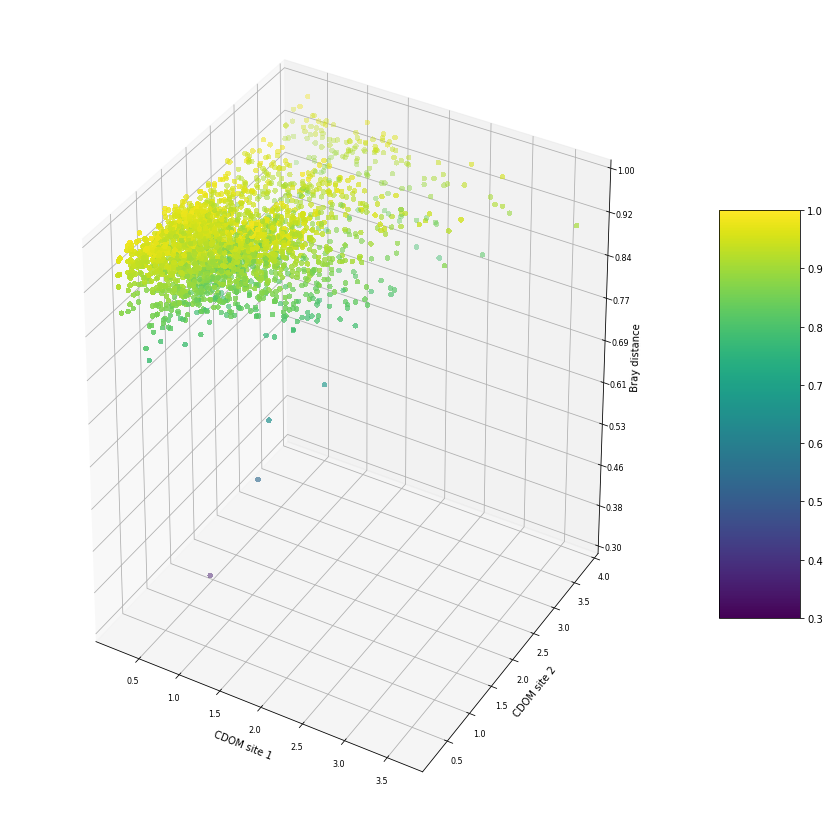

In [2]:
#print(pd.DataFrame(CDOM))
#print(pd.DataFrame(CDOM.mesh))
#print(CDOM.loc[:,"ASV.dist"])

# Plot Bray distance by CDOM middle value
plt.figure(figsize=(15,15))
#plt.scatter(CDOM.loc[:,2], CDOM.loc[:,3], 'r--', label = 'Accuracy')
plt.scatter(CDOM.loc[:,"CDOM.mid"], CDOM.loc[:,"ASV.dist"], label = 'Bray distance', s=1)
plt.ylabel("Bray distance")
plt.xlabel("CDOM")
plt.legend()   
plt.show()

#f.savefig("Bray_distance_by_CDOM.pdf", bbox_inches='tight')

# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan
#print(pd.DataFrame(CDOM.mesh))

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
"""# For surface
ax = fig.gca(projection="3d")
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)
"""
surf = ax.scatter(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        c=CDOM.loc[:,"ASV.dist"], cmap='viridis',linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1)
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


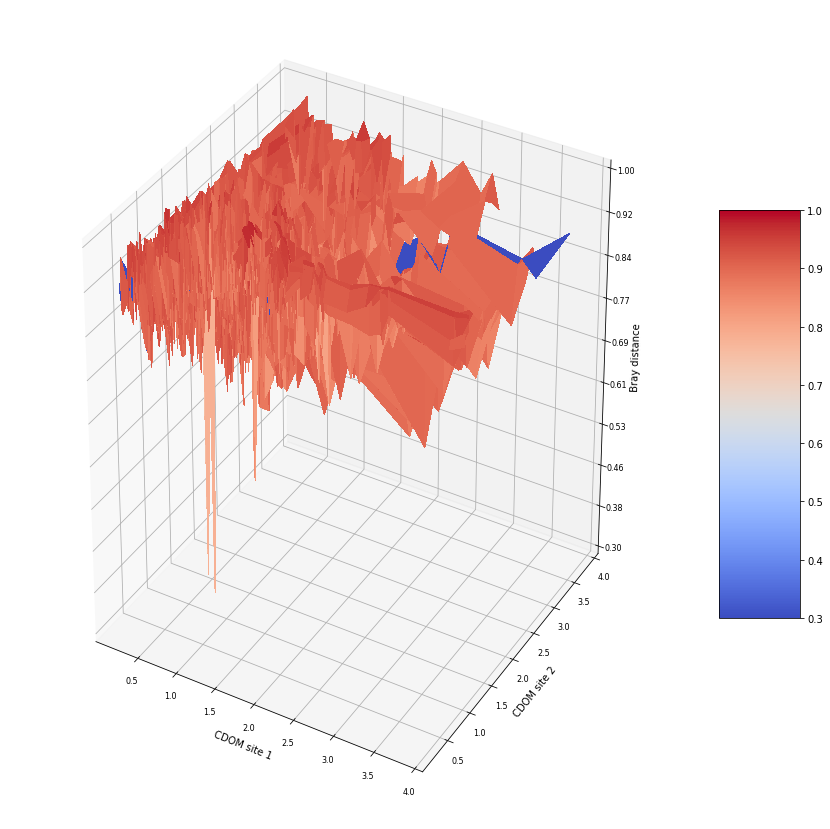

In [3]:
# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan
#print(pd.DataFrame(CDOM.mesh))

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
# For surface
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

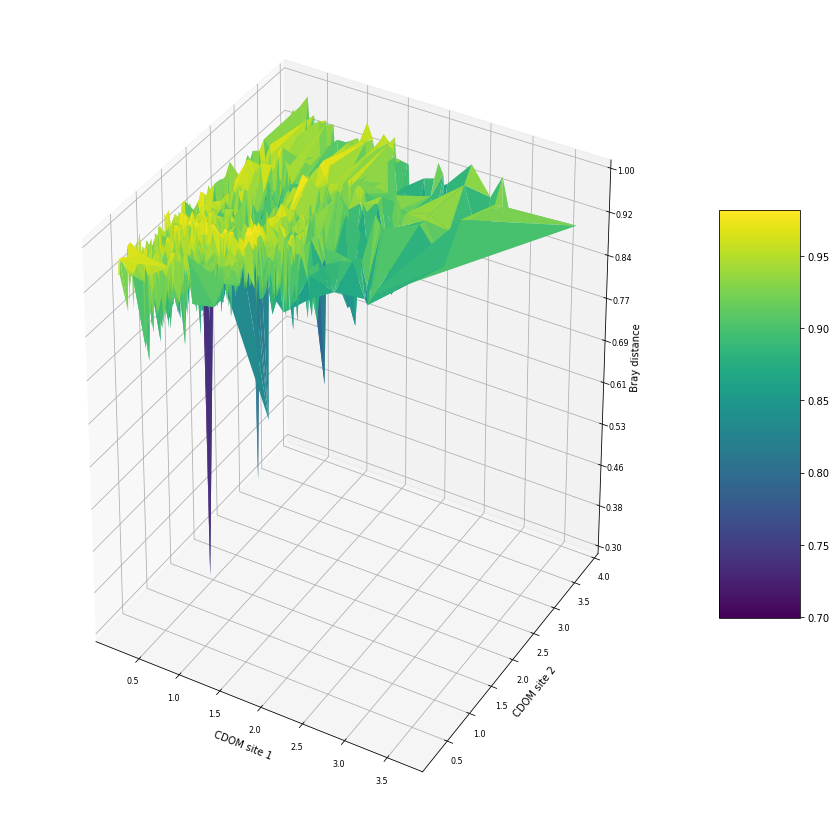

In [4]:
#print(CDOM.loc[:,"CDOM.x1"])
# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
"""# For surface
ax = fig.gca(projection="3d")
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)

surf = ax.scatter(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        c=CDOM.loc[:,"ASV.dist"], cmap='viridis',linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1)
                        """
surf = ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
#plt.savefig("Bray_distance_by_CDOM(surface).pdf", bbox_inches='tight')

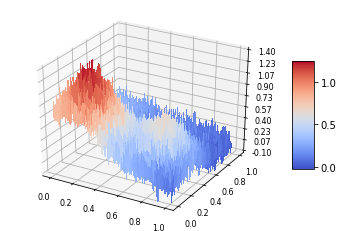

In [5]:
def FrankeFunction(x,y):
  term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
  term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
  term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
  term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
  return term1 + term2 + term3 + term4

def f_noise_franke(x, y):
  shape_z = np.shape(FrankeFunction(x,y))
  noise_z = 0.1*np.random.randn(shape_z[0], shape_z[1])
  return noise_z

def FrankeFunctionData():
  x = np.arange(0, 1, 0.005)
  y = np.arange(0, 1, 0.005)
  x, y = np.meshgrid(x,y)
  z = FrankeFunction(x, y) + f_noise_franke(x, y)
  return x, y, z

ffd = FrankeFunctionData()

#print(pd.DataFrame(ffd[0]), pd.DataFrame(ffd[1]), pd.DataFrame(ffd[2]))
  
# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(ffd[0], ffd[1], ffd[2], cmap=cm.coolwarm,linewidth=0, 
                      antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
  

In [0]:
class NeuralNetworkML:  #Multiple hidden layers
    def __init__(
            self,
            X_data,
            Y_data,
            trainingShare=0.5,
            n_hidden_layers=2,
            n_hidden_neurons=[24,12],
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0,
            fixed_LR=False,
            method="classification",
            activation="sigmoid"):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.trainingShare = trainingShare
        self.method = method
        self.split_data = self.SplitData(self.X_data_full, self.Y_data_full, self.trainingShare)
        if self.method=="classification":
          self.XTrain = self.split_data[0].toarray()
          self.XTest = self.split_data[1].toarray()
        else:
          self.XTrain = self.split_data[0]
          self.XTest = self.split_data[1]
        self.yTrain = self.split_data[2]
        self.yTest = self.split_data[3]

        self.n_inputs = self.XTrain.shape[0]
        self.n_features = self.XTrain.shape[1]
        self.n_hidden_layers = n_hidden_layers
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.eta = eta
        self.lmbd = lmbd
        self.fixed_LR = fixed_LR
        self.activation = activation

        self.create_biases_and_weights()
        self.accuracy_list = []
        self.cost_list = []
        self.models = []

    def create_biases_and_weights(self):
        for n in range(self.n_hidden_layers):
          exec("self.n_hidden_neurons_" + str(eval("n + 1")) + "=" + str(eval("self.n_hidden_neurons[n]")))
        for n in range(self.n_hidden_layers):
          if n==0:
            exec("self.hidden_weights_1 = np.random.randn(self.n_features, self.n_hidden_neurons_1)")
            exec("self.hidden_bias_1 = np.zeros((1, self.n_hidden_neurons_1)) + 0.01")
          else:
            exec("self.hidden_weights_" + str(eval("n + 1")) + "= np.random.randn(self.n_hidden_neurons_" + str(eval("n")) + ", self.n_hidden_neurons_" + str(eval("n+1")) + ")")
            exec("self.hidden_bias_" + str(eval("n + 1")) + "= np.zeros((1, self.n_hidden_neurons_" + str(eval("n + 1")) + ")) + 0.01")
          exec("self.output_weights = np.random.randn(self.n_hidden_neurons_" + str(eval("self.n_hidden_layers")) + ", self.n_categories)")
          exec("self.output_bias = np.zeros((1, self.n_categories)) + 0.01")

    def act(self, x):
      if self.activation=="sigmoid":
        return self.SigmoidFunction(x)
      elif self.activation=="ELU":
        return self.ELU(x, alpha=0.01)
      elif self.activation=="LeakyReLU":
        return self.LeakyReLU(x, alpha=0.01)

    def feed_forward(self):
        for n in range(self.n_hidden_layers):
          if n==0:
            self.z_h_1 = np.matmul(self.XTrain_batch, self.hidden_weights_1) + self.hidden_bias_1
            self.a_h_1 = self.act(self.z_h_1)
          else:
            exec("self.z_h_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ", self.hidden_weights_" + str(eval("n + 1")) + ") + self.hidden_bias_" + str(eval("n + 1")))
            exec("self.a_h_" + str(eval("n + 1")) + " = self.act(self.z_h_" + str(eval("n + 1")) + ")")
        exec("self.z_o = np.matmul(self.a_h_" + str(eval("self.n_hidden_layers")) + ", self.output_weights) + self.output_bias")
        self.probabilities = self.LogRegPredict(self.z_o)
        self.a_o = self.act(self.z_o)
      
    def feed_forward_out(self, X):
        for n in range(self.n_hidden_layers):
          if n==0:
            z_h_1 = np.matmul(X, self.hidden_weights_1) + self.hidden_bias_1
            a_h_1 = self.act(z_h_1)
          # feed-forward for output
          else:
            exec("z_h_" + str(eval("n + 1")) + " = np.matmul(a_h_" + str(eval("n")) + ", self.hidden_weights_" + str(eval("n + 1")) + ") + self.hidden_bias_" + str(eval("n + 1")))
            exec("a_h_" + str(eval("n + 1")) + " = self.act(z_h_" + str(eval("n + 1")) + ")")
        z_o=eval("np.matmul(a_h_" + str(eval("self.n_hidden_layers")) + ", self.output_weights) + self.output_bias")
        a_o = self.act(z_o)
        if self.method=="classification":
          probabilities = self.LogRegPredict(z_o)
        elif self.method=="regression":
          yPred = z_o
          probabilities = z_o
        return probabilities
          
    def LogRegPredict(self, z_o):
      yPred = self.SigmoidFunction(z_o)
      for i in range(0, yPred.shape[0], 1):
        if yPred[i] <= 0.5:
          yPred[i] = 0
        else:
          yPred[i] = 1
      return yPred

    def backpropagation(self):
      for n in range(self.n_hidden_layers - 1, -1, -1):
        if n + 1 == self.n_hidden_layers:
          if self.method=="regression":
            error_output = (self.a_o - self.yTrain_batch) #Cost function: derivative of mean squared error
          else:
            error_output = (self.a_o - self.yTrain_batch) * self.a_o * (1 - self.a_o) #Cost function: derivative of cross-entropy
          if self.n_hidden_layers==1:
            self.error_hidden_1 = np.matmul(error_output, self.output_weights.T) * self.a_h_1 * (1 - self.a_h_1)
            self.output_weights_gradient = np.matmul(self.a_h_1.T, error_output)
            self.output_bias_gradient = np.sum(error_output, axis=0)
            self.hidden_weights_gradient_1 = np.matmul(self.XTrain_batch.T, self.error_hidden_1)
            self.hidden_bias_gradient_1 = np.sum(self.error_hidden_1, axis=0)
          else:
            exec("self.error_hidden_" + str(eval("self.n_hidden_layers")) + " = np.matmul(error_output, self.output_weights.T) * self.a_h_" + str(eval("self.n_hidden_layers")) + " * (1 - self.a_h_" + str(eval("self.n_hidden_layers")) + ")")
            exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ".T, self.error_hidden_" + str(eval("n + 1")) + ")")
            exec("self.hidden_bias_gradient_" + str(eval("n + 1")) + " = np.sum(self.error_hidden_" + str(eval("n + 1")) + ", axis=0)")
            exec("self.output_weights_gradient = np.matmul(self.a_h_" + str(eval("n + 1")) + ".T, error_output)")
          self.output_bias_gradient = np.sum(error_output, axis=0)
        elif n > 0:
          exec("self.error_hidden_" + str(eval("n+1")) + " = np.matmul(self.error_hidden_" + str(eval("n + 2")) + ", self.hidden_weights_" + str(eval("n + 2")) + ".T) * self.a_h_" + str(eval("n+1")) + " * (1 - self.a_h_" + str(eval("n+1")) + ")")
          exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ".T, self.error_hidden_" + str(eval("n + 1")) + ")")
          exec("self.hidden_bias_gradient_" + str(eval("n + 1")) + " = np.sum(self.error_hidden_" + str(eval("n + 1")) + ", axis=0)")
        else:
          if self.n_hidden_layers == 1:
            self.error_hidden_1 = np.matmul(error_output, self.output_weights.T) * self.a_h_1 * (1 - self.a_h_1)
          else:
            self.error_hidden_1 = np.matmul(self.error_hidden_2, self.hidden_weights_2.T) * self.a_h_1 * (1 - self.a_h_1)
            self.hidden_weights_gradient_1 = np.matmul(self.XTrain_batch.T, self.error_hidden_1)
            self.hidden_bias_gradient_1 = np.sum(self.error_hidden_1, axis=0)

      if self.lmbd > 0.0:
        self.output_weights_gradient += self.lmbd * self.output_weights
        for n in range(self.n_hidden_layers - 1, -1, -1):
          exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " += self.lmbd * self.hidden_weights_" + str(eval("n + 1")))
 
      self.output_weights -= self.eta * self.output_weights_gradient/self.batch_size
      self.output_bias -= self.eta * self.output_bias_gradient/self.batch_size

      for n in range(self.n_hidden_layers - 1, -1, -1):
        exec("self.hidden_weights_" + str(eval("n + 1")) + " -= self.eta * self.hidden_weights_gradient_" + str(eval("n + 1")) + "/self.batch_size")
        exec("self.hidden_bias_" + str(eval("n + 1")) + " -= self.eta * self.hidden_bias_gradient_" + str(eval("n + 1")) + "/self.batch_size")

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        #return np.argmax(probabilities, axis=1)
        return probabilities

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        t0, t1 = 5, 500
        self.accuracy_list.append(self.accuracy(self.yTest, self.predict(self.XTest)))
        for i in range(self.epochs):
            self.shuffled_data = self.shuffle(self.XTrain, self.yTrain) # Rows for XTrain, yTrain are shuffled for each epoch.
            self.XTrain_shuffled = self.shuffled_data[0]
            self.yTrain_shuffled = self.shuffled_data[1]
            for batch in range(int(self.XTrain.shape[0]/self.batch_size)):
                self.XTrain_batch = self.XTrain_shuffled[self.batch_size * batch: self.batch_size * (batch + 1), :] #Minibatch training data
                self.yTrain_batch = self.yTrain_shuffled[self.batch_size * batch: self.batch_size * (batch + 1)] #Minibatch training data
                
                if self.fixed_LR==False:
                  t = i*int(self.XTrain.shape[0]/self.batch_size) + batch #Variable learning rate
                  self.eta = self.step_length(t, t0, t1) #Variable learning rate
                #print(self.eta)
                
                self.feed_forward()
                self.backpropagation()
            self.accuracy_list.append(self.accuracy(self.yTest, self.predict(self.XTest)))
            
    def shuffle(self, XTrain, yTrain):
      random.seed(1)
      n_rows = list(range(0, XTrain.shape[0], 1))
      random.shuffle(n_rows)
      XTrain_post_shuffle = XTrain[n_rows,:]
      yTrain_post_shuffle = yTrain[n_rows]
      return XTrain_post_shuffle, yTrain_post_shuffle

    def step_length(self,t,t0,t1):
      return t0/(t+t1)

    def SplitData(self, X, y, trainingShare=0.5):
      seed  = 1
      if isinstance(X, pd.DataFrame):
        X = X.values
      if isinstance(y, pd.DataFrame):
        y = y.values
      XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size=trainingShare, \
                                              test_size = 1-trainingShare,
                                             random_state=seed)
      return XTrain, XTest, yTrain, yTest

    def accuracy(self, yTest, yPred):
      if self.method=="classification":
        return  (yTest.flatten() == yPred.flatten()).sum()/len(yTest.flatten())
      if self.method=="regression":
        self.models.append(self.predict(self.X_data_full))
        return np.mean((self.yTest - self.predict(self.XTest))**2)
    
    def SigmoidFunction(self, x):
      sigma_fn = np.vectorize(lambda x: 1/(1+np.exp(-x)))
      return 1/(1+np.exp(-x))

    def LogRegPredict(self, z_o):
      yPred = self.SigmoidFunction(z_o)
      for i in range(0, yPred.shape[0], 1):
        if yPred[i] <= 0.5:
          yPred[i] = 0
        else:
          yPred[i] = 1
      return yPred

    def ELU(self, x, alpha=0.01):
      ao = x
      for i in range(0, x.shape[0], 1):
        for j in range(0, x.shape[1], 1):
          if x[i,j] < 0:
            ao[i,j] = alpha*(np.exp(x[i,j]) - 1)
      return ao

    def LeakyReLU(self, x, alpha=0.01):
      ao = x
      for i in range(0, x.shape[0], 1):
        for j in range(0, x.shape[1], 1):
          if x[i,j] <= 0:
            ao[i,j] = alpha*x[i,j]
      return ao

In [0]:
# Load bacterial community data
url_ASV = "https://github.com/laurent0001/Project-3/blob/master/ASV_table.tsv?raw=true"
url_ASV_ranged = "https://github.com/laurent0001/Project-3/blob/master/ASV_table_ranged.tsv?raw=true"
url_metadata = "https://github.com/laurent0001/Project-3/raw/master/Metadata_table.tsv?raw=true"
url_metadata_scaled = "https://github.com/laurent0001/Project-3/raw/master/Metadata_table_scaled.tsv?raw=true"
ASV = pd.read_csv(url_ASV, sep="\t")
ASV_ranged = pd.read_csv(url_ASV_ranged, sep="\t")
metadata = pd.read_csv(url_metadata, sep="\t")
metadata_scaled = pd.read_csv(url_metadata_scaled, sep="\t")

[39.32860944094957, 40.892051160915926, 42.277356941345346, 43.70784512959338, 45.140169672943806, 46.5979726394874, 48.09421502632003, 49.59184915992183, 51.07998636710663, 52.57184806931098, 54.07721207974002, 55.605306961321126, 57.16246446090404, 58.76022760419844, 60.418697360074226, 62.09899605748169, 63.75749379343486, 65.42713507841937, 67.11336598976729, 68.81409432715766, 70.52709395895496, 72.2518517453717, 73.98948874296563, 75.74061493051458, 77.50546995925359, 79.28606759180117, 81.08460985888343, 82.89745729585893, 84.7144453700049, 86.53364033048727, 88.363893842491, 90.20868833949446, 92.0645724710684, 93.92918191321421, 95.80051231265753, 97.67800054909844, 99.56369751009609, 101.46379506336582, 103.38868065184623, 105.34810941783869, 107.33346624158443, 109.31470117264286, 111.29198821177175, 113.26918840400175, 115.24811888069101, 117.23107681000903, 119.22071778386339, 121.21931064231113, 123.22853360203612, 125.25008991918449, 127.28634484427673]
Minimum MSE : 39.

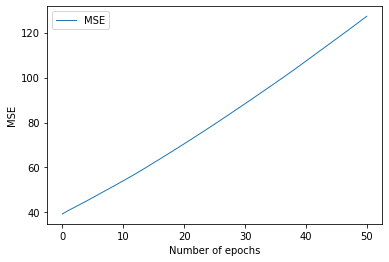

In [93]:
# Neural network with multiple layers - regression - bacterial community data
X_ASV = ASV_ranged
X_ASV.columns = [''] * len(X_ASV.columns)
X_ASV = X_ASV.to_numpy()
y_CDOM = metadata.iloc[:, 27][:, np.newaxis]

NN = NeuralNetworkML(X_ASV, y_CDOM, trainingShare=0.80, n_hidden_layers=5, n_hidden_neurons=[2000, 1000, 500, 250, 125], n_categories=1,
                     epochs=50, batch_size=10, eta=1e-3, lmbd=0, fixed_LR=True, method="regression", activation="sigmoid")
NN.train()
test_predict = NN.predict(NN.XTest)
best_prediction = NN.models[NN.accuracy_list.index(min(NN.accuracy_list))]
print(NN.accuracy_list)
print("Minimum MSE :", min(NN.accuracy_list), "reached at epoch ", NN.accuracy_list.index(min(NN.accuracy_list)))

plt.figure()
plt.plot(list(range(0, len(NN.accuracy_list), 1)), NN.accuracy_list, '-', label = 'MSE', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()   
plt.show()

#skplt.metrics.plot_confusion_matrix(NN.yTest.ravel(), test_predict, normalize=True)

In [95]:
!pip install xgboost

In [123]:
# XGboost with scikitlearn
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
from numpy import loadtxt
from xgboost import XGBRegressor  #scikit-learn API for XGBoost regression
from xgboost import XGBRFRegressor  #scikit-learn API for XGBoost random forest regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# split data into train and test sets
y_CDOM = metadata.iloc[:, 27] #Requires 1d array
X_train, X_test, y_train, y_test = train_test_split(X_ASV, y_CDOM, train_size=0.8, \
test_size = 0.2, random_state=1)
#!!!Implement Xavier initialization!!!
# fit model no training data
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_train, y_train)], eval_metric='rmse')
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
#predictions = [round(value) for value in y_pred]

# evaluate predictions
MSE_XGboost = mean_squared_error(y_test, y_pred)
MSE_XGboost_train = mean_squared_error(y_train, y_pred_train)
print("MSE on test data:", MSE_XGboost)
print(pd.DataFrame(np.concatenate((y_test[:, np.newaxis], y_pred[:, np.newaxis]), axis=1)))
print("MSE on train data:", MSE_XGboost_train)
print(pd.DataFrame(np.concatenate((y_train[:, np.newaxis], y_pred_train[:, np.newaxis]), axis=1)))
print(model.evals_result())

# First XGBoost model for Pima Indians dataset
# fit model no training data
X_train, X_test, y_train, y_test = train_test_split(X_ASV, y_CDOM, train_size=0.5, \
test_size = 0.5, random_state=1)
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
MSE_XGboost = mean_squared_error(y_test, y_pred)
MSE_XGboost_train = mean_squared_error(y_train, y_pred_train)
print("MSE on test data:", MSE_XGboost)
print(pd.DataFrame(np.concatenate((y_test[:, np.newaxis], y_pred[:, np.newaxis]), axis=1)))
print("MSE on train data:", MSE_XGboost_train)
print(pd.DataFrame(np.concatenate((y_train[:, np.newaxis], y_pred_train[:, np.newaxis]), axis=1)))



[0]	validation_0-rmse:0.978697	validation_1-rmse:0.978697
[1]	validation_0-rmse:0.908184	validation_1-rmse:0.908184


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[2]	validation_0-rmse:0.844283	validation_1-rmse:0.844283
[3]	validation_0-rmse:0.785495	validation_1-rmse:0.785495
[4]	validation_0-rmse:0.731916	validation_1-rmse:0.731916
[5]	validation_0-rmse:0.68298	validation_1-rmse:0.68298
[6]	validation_0-rmse:0.637116	validation_1-rmse:0.637116
[7]	validation_0-rmse:0.597329	validation_1-rmse:0.597329
[8]	validation_0-rmse:0.559123	validation_1-rmse:0.559123
[9]	validation_0-rmse:0.524149	validation_1-rmse:0.524149
[10]	validation_0-rmse:0.493019	validation_1-rmse:0.493019
[11]	validation_0-rmse:0.462491	validation_1-rmse:0.462491
[12]	validation_0-rmse:0.435906	validation_1-rmse:0.435906
[13]	validation_0-rmse:0.409796	validation_1-rmse:0.409796
[14]	validation_0-rmse:0.385342	validation_1-rmse:0.385342
[15]	validation_0-rmse:0.361827	validation_1-rmse:0.361827
[16]	validation_0-rmse:0.340861	validation_1-rmse:0.340861
[17]	validation_0-rmse:0.321134	validation_1-rmse:0.321134
[18]	validation_0-rmse:0.302803	validation_1-rmse:0.302803
[19]	va

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE on test data: 0.4955196963384977
       0         1
0   0.39  0.847650
1   0.44  0.983802
2   2.12  3.297864
3   0.70  1.341507
4   2.07  0.666847
5   1.41  1.066141
6   2.08  2.787898
7   1.24  1.465990
8   1.12  2.774214
9   0.25  1.328091
10  1.11  1.481982
11  1.56  1.295711
12  1.00  1.169321
13  2.01  1.518884
14  1.34  1.594811
15  2.64  1.111111
16  0.63  1.264354
17  0.67  1.239230
18  1.65  0.974013
19  1.33  1.183866
20  0.59  1.041845
21  1.34  0.972181
22  0.72  1.349220
23  1.50  1.226318
24  1.23  1.181717
25  1.66  2.907270
26  0.40  1.080805
27  0.96  1.005040
28  1.84  1.650085
29  1.33  1.154769
30  1.00  1.310191
31  0.51  1.216088
32  0.66  1.473506
33  1.01  1.313915
34  0.43  1.087008
35  0.49  0.969838
MSE on train data: 5.886310013487242e-06
       0         1
0   2.78  2.775897
1   1.56  1.558868
2   0.58  0.581752
3   1.21  1.208056
4   1.02  1.019810
5   1.63  1.629970
6   0.59  0.590438
7   0.57  0.570958
8   1.84  1.838995
9   1.14  1.138858
10  0.92  